In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

SIZE = 500 # in pixels, of the image/video
SIMSIZE = 2 # simulated area is from -2 to +2 in the x and y axes

def to_simsize(x):
    return (x * SIMSIZE*2/SIZE)-SIMSIZE

class Mass:
    def __init__(self, y=5, x=5, mass=100000):
        self.mass = mass
        self.y = y
        self.x = x
        
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.x_acc = 0
        self.y_acc = 0
        self.magnitude = 0
    
    def get_distances(self, mass):
        return (mass.y - self.y), (mass.x - self.x)
    
    @property
    def color(self):
        return (self.y_acc, self.x_acc, self.magnitude)
    
    def get_pulls(self, masses):
        if any([(self.y, self.x) == (mass.y, mass.x) for mass in masses]):
            return
        for mass in masses:
            y_d, x_d = self.get_distances(mass)
            distance = (y_d**2 + x_d**2)**0.5
            magnitude_over_hypotenuse = mass.mass / distance**3
            self.y_acc += magnitude_over_hypotenuse * y_d
            self.x_acc += magnitude_over_hypotenuse * x_d
        self.magnitude = (self.y_acc**2 + self.x_acc**2)**0.5

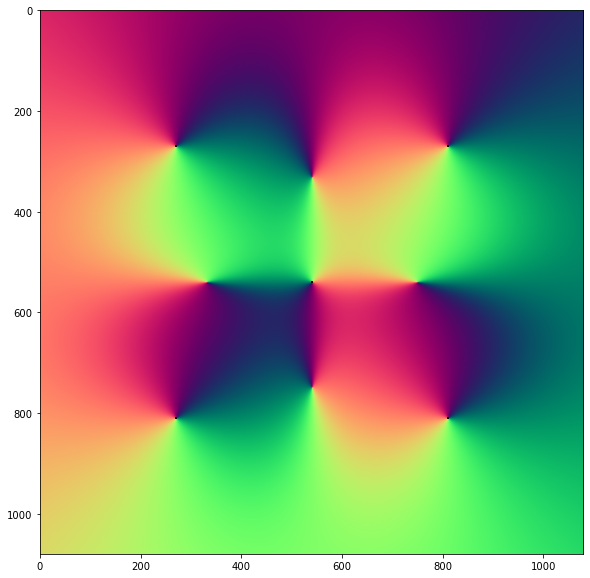

In [ ]:
'''
Generate an image
'''
x, y = 1, -1
masses = (Mass(x, y, 1),
          Mass(-x, -y, 1),
          Mass(x, -y, 1),
          Mass(-x, y, 1))

canvas = np.zeros((SIZE, SIZE, 3))

for y in range(len(canvas)):
    for x in range(len(canvas[0])):
        sim_y, sim_x = to_simsize(y), to_simsize(x)
        vec = Vector(sim_y, sim_x)
        vec.get_pulls(masses)
        canvas[-y,x] = vec.color

canvas /= np.expand_dims(canvas[:,:,2], -1)
canvas[:,:,:2] /= 2
canvas[:,:,:2] += 0.5
canvas[:,:,2] /= 2.5 #dumbing down the blue channel

plt.figure(figsize=(10, 10))
plt.imshow(canvas)

In [ ]:
'''
Generate a video
'''
FPS = 30
LENGTH = 5
video = cv2.VideoWriter('video.mp4', cv2.VideoWriter_fourcc('A','V','C','1'), FPS, (SIZE, SIZE))

for i, a in enumerate(np.linspace(0, np.pi*2, LENGTH * FPS)):
    x, y = np.cos(a), np.sin(a)
    masses = (Mass(x, y, 1),
              Mass(-x, -y, 2),
              Mass(x, -y, 1),
              Mass(-x, y, 2))

    canvas = np.zeros((SIZE, SIZE, 3))

    for y in range(len(canvas)):
        for x in range(len(canvas[0])):
            sim_y, sim_x = to_simsize(y), to_simsize(x)
            vec = Vector(sim_y, sim_x)
            vec.get_pulls(masses)
            canvas[-y,x] = vec.color

    canvas /= np.expand_dims((canvas[:,:,0]**2 + canvas[:,:,1]**2)**0.5, -1)
    canvas[:,:,:2] /= 2
    canvas[:,:,:2] += 0.5
    canvas[:,:,2] /= 2.5
    

    video.write(cv2.cvtColor((canvas*255).astype(np.uint8), cv2.COLOR_RGB2BGR))

video.release()